In [1]:
%matplotlib inline

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer

from sklearn.linear_model import LogisticRegression , Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, roc_curve

# Model Training and Improvement
------------------------------------------------------------------

In [3]:
EPS = 1e-10

In [4]:
diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])

C:\Users\danie\AppData\Local\Temp\ipykernel_21044\2956128080.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])


In [5]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
diabetes_data.readmitted

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [9]:
diabetes_data.readmitted.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [10]:
diabetes_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [11]:
diabetes_data.race.value_counts(dropna = False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [12]:
diabetes_data.gender.value_counts(dropna = False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [13]:
diabetes_data.age.value_counts(dropna = False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [14]:
diabetes_data.age.value_counts(dropna = False) / len(diabetes_data) * 100

age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: count, dtype: float64

In [15]:
diabetes_data.discharge_disposition_id.value_counts(dropna = False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [16]:
diabetes_data.metformin.value_counts(dropna = False)

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

In [17]:
diabetes_data.nunique() / len(diabetes_data)

encounter_id                1.000000
patient_nbr                 0.702769
race                        0.000049
gender                      0.000029
age                         0.000098
weight                      0.000088
admission_type_id           0.000079
discharge_disposition_id    0.000255
admission_source_id         0.000167
time_in_hospital            0.000138
payer_code                  0.000167
medical_specialty           0.000708
num_lab_procedures          0.001160
num_procedures              0.000069
num_medications             0.000737
number_outpatient           0.000383
number_emergency            0.000324
number_inpatient            0.000206
diag_1                      0.007036
diag_2                      0.007350
diag_3                      0.007753
number_diagnoses            0.000157
max_glu_serum               0.000029
A1Cresult                   0.000029
metformin                   0.000039
repaglinide                 0.000039
nateglinide                 0.000039
c

In [18]:
diabetes_data.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

<Axes: >

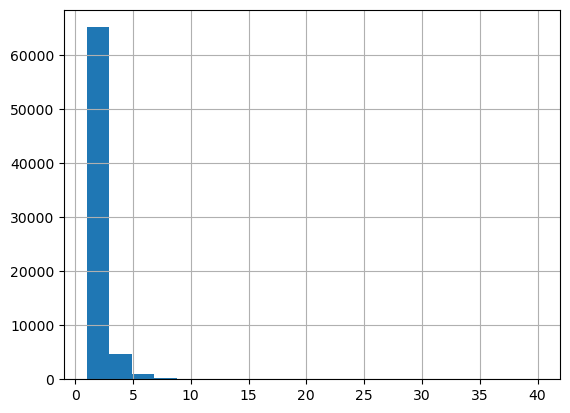

In [19]:
diabetes_data.patient_nbr.value_counts().hist(bins = 20)

In [20]:
diabetes_data.columns[diabetes_data.columns.str.contains("_id")]

Index(['encounter_id', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id'],
      dtype='object')

In [21]:
diabetes_data.pioglitazone.unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [22]:
diabetes_attributes = diabetes_data.drop(columns = "readmitted")
diabetes_target = diabetes_data.readmitted

In [23]:
diabetes_attributes_dummies = pd.get_dummies(diabetes_attributes)

In [24]:
logistic_regression = LogisticRegression()

In [25]:
logistic_regression.fit(diabetes_attributes_dummies, diabetes_target)

LogisticRegression()

In [26]:
logistic_regression.coef_

array([[-3.31701395e-09, -3.86905107e-09, -1.15814534e-15, ...,
        -3.26369841e-16, -1.63318872e-16, -3.02903976e-16],
       [-1.50329991e-10,  4.51003945e-09, -1.47130836e-16, ...,
        -1.14848644e-16, -1.11876233e-16,  7.41720589e-17],
       [ 3.46734394e-09, -6.40988385e-10,  1.30527618e-15, ...,
         4.41218484e-16,  2.75195106e-16,  2.28731917e-16]])

In [27]:
scaler = MinMaxScaler()

In [28]:
diabetes_attributes_scaled = scaler.fit_transform(diabetes_attributes_dummies)

In [29]:
logistic_regression.fit(diabetes_attributes_scaled, diabetes_target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logistic_regression.score(diabetes_attributes_scaled, diabetes_target)

0.5948548631173476

In [31]:
logistic_regression.score(diabetes_attributes_dummies, diabetes_target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5382052944991451

In [32]:
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression())
])

In [33]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [34]:
sample_data = diabetes_data.sample(5000, random_state = 42)

In [35]:
sample_attributes = sample_data.drop(columns = "readmitted")

In [36]:
sample_target = sample_data.readmitted

In [37]:
sample_attributes = pd.get_dummies(sample_attributes)

In [38]:
pipeline.fit(sample_attributes, sample_target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [39]:
ohe = OneHotEncoder()

In [40]:
ohe.fit(sample_attributes)

OneHotEncoder()

In [41]:
ohe.feature_names_in_

array(['encounter_id', 'patient_nbr', 'admission_type_id', ...,
       'change_No', 'diabetesMed_No', 'diabetesMed_Yes'], dtype=object)

In [42]:
ohe.categories_

[array([   325848,   1139226,   1212006, ..., 443730002, 443775086,
        443824292], dtype=int64),
 array([    10827,     15849,     27315, ..., 186774602, 187042703,
        189502619], dtype=int64),
 array([1, 2, 3, 5, 6, 7, 8], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 17, 18, 22, 23,
        24, 25, 28], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  9, 17, 20], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  

In [43]:
sample_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [44]:
categorical_columns = sample_data.dtypes[sample_data.dtypes == np.object_].index.values

In [45]:
categorical_columns = categorical_columns[:-1]

In [46]:
numerical_columns = [
       'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

In [47]:
preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder(), categorical_columns),
    ("numerical", MinMaxScaler(), numerical_columns)
], remainder = "passthrough")

In [48]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazon...
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype=object)),
                                ('numerical', MinMaxScaler(),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [49]:
log_transformer = FunctionTransformer(np.log10)

In [50]:
number_processor = Pipeline([
    ("log_transformer", FunctionTransformer(lambda x: np.log10(x + EPS))),
    ("minmax", MinMaxScaler())
])

In [51]:
number_processor

Pipeline(steps=[('log_transformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000022B1F85DE40>)),
                ('minmax', MinMaxScaler())])

In [52]:
preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder(), categorical_columns),
    ("numerical", MinMaxScaler(), numerical_columns)
])

In [53]:
preprocessor

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acar...
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype=object)),
                                ('numerical', MinMaxScaler(),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [54]:
log_scaler = FunctionTransformer(np.log10)

In [55]:
number_processor = Pipeline([
    ("log_tranformer", FunctionTransformer(lambda x: np.log10(x + EPS))),
    ("minmax", MinMaxScaler((-5, 5)))
])

In [56]:
number_processor

Pipeline(steps=[('log_tranformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                ('minmax', MinMaxScaler(feature_range=(-5, 5)))])

In [57]:
preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder(), categorical_columns),
    ("numerical", number_processor, numerical_columns)
])

In [58]:
preprocessor

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acar...
                                 Pipeline(steps=[('log_tranformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                 ('minmax',
                                                  MinMaxScaler(feature_range=(-5,
                                                                              5)))]),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [59]:
pipeline = Pipeline([
     ("preprocess", preprocessor),
     ("classifier", LogisticRegression())
])

In [60]:
sample_attributes = sample_data.drop(columns = "readmitted")
sample_target = sample_data.readmitted

In [61]:
pipeline.fit(sample_attributes, sample_target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [62]:
pipeline.score(sample_attributes, sample_target)

0.631

In [63]:
pickle.dump(logistic_regression, open("prediction_pipeline.pkl", "wb"))

In [64]:
pipeline.steps[0][1]

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acar...
                                 Pipeline(steps=[('log_tranformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                 ('minmax',
                                                  MinMaxScaler(feature_range=(-5,
                                                                              5)))]),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [65]:
pipeline.predict(sample_attributes.sample(10))

array(['NO', 'NO', 'NO', 'NO', '>30', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [66]:
diabetes_data = pd.read_csv("data/diabetic_data.csv")

In [67]:
sample_data = diabetes_data.sample(5000, random_state = 12341234)
attributes = sample_data.drop(columns = ["readmitted"])
target = sample_data.readmitted

In [68]:
pipeline.fit(attributes, target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [76]:
pipeline["classifier"].coef_

array([[-0.50107267,  0.16844358, -0.21929038, ...,  0.02630075,
         0.03655142,  0.07877225],
       [ 0.23919447, -0.10048857, -0.14741909, ...,  0.01196338,
         0.02201173, -0.00159044],
       [ 0.2618782 , -0.06795501,  0.36670948, ..., -0.03826413,
        -0.05856314, -0.07718181]])

In [77]:
pipeline_reg = Pipeline([
     ("preprocess", preprocessor),
     ("classifier", LogisticRegression(C = 0.00001))
])

In [78]:
pipeline_reg.fit(attributes, target)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1e-05))])

In [79]:
pipeline_reg["classifier"].coef_

array([[-7.42152382e-05,  7.18186755e-05, -1.78477644e-05, ...,
         2.10856590e-03,  6.66231552e-03,  1.25777183e-03],
       [-5.08199078e-05, -1.52398638e-04, -1.75613157e-05, ...,
         4.41058844e-03,  9.44347553e-03,  1.97573796e-03],
       [ 1.25035146e-04,  8.05799622e-05,  3.54090801e-05, ...,
        -6.51915433e-03, -1.61057910e-02, -3.23350979e-03]])

In [82]:
len(train_test_split(attributes))

2

In [118]:
attributes_train, attributes_test, target_train, target_test = train_test_split(
    attributes,
    target,
    test_size = 0.18, 
    random_state = 121212,
    stratify = target
)

In [119]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((4100, 49), (900, 49), (4100,), (900,))

In [120]:
target.value_counts(normalize = True)

readmitted
NO     0.5576
>30    0.3360
<30    0.1064
Name: proportion, dtype: float64

In [121]:
target_train.value_counts(normalize = True)

readmitted
NO     0.557561
>30    0.336098
<30    0.106341
Name: proportion, dtype: float64

In [122]:
target_test.value_counts(normalize = True)

readmitted
NO     0.557778
>30    0.335556
<30    0.106667
Name: proportion, dtype: float64

In [124]:
pipeline.fit(attributes_train, target_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [129]:
print(classification_report(target_train, pipeline.predict(attributes_train)))

              precision    recall  f1-score   support

         <30       0.59      0.14      0.23       436
         >30       0.60      0.49      0.54      1378
          NO       0.68      0.86      0.76      2286

    accuracy                           0.66      4100
   macro avg       0.62      0.50      0.51      4100
weighted avg       0.65      0.66      0.63      4100



In [133]:
pipeline["classifier"].C = 1000

In [134]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1000))])

In [154]:
cv = GridSearchCV(pipeline, param_grid = {
    "classifier__C": [1, 10, 100],
    "preprocess__numerical__minmax__feature_range": [(-1, 1), (0, 1), (-5, 5)]
}, cv = 2).fit(attributes, target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\si

In [156]:
cv.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'piogl...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000022B1F85EE80>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1))])

In [157]:
cv.best_params_

{'classifier__C': 1, 'preprocess__numerical__minmax__feature_range': (-1, 1)}

In [158]:
cv.cv_results_

{'mean_fit_time': array([0.15600491, 0.14274085, 0.13633597, 0.15699232, 0.14085841,
        0.14260447, 0.14810479, 0.21460271, 0.15689552]),
 'std_fit_time': array([0.00138831, 0.01211059, 0.00273144, 0.00576031, 0.00566912,
        0.00510418, 0.00150812, 0.03444457, 0.00775206]),
 'mean_score_time': array([0.00699997, 0.00699961, 0.00699973, 0.00749457, 0.00649524,
        0.00750244, 0.00900364, 0.00951433, 0.00812745]),
 'std_score_time': array([9.53674316e-07, 9.99569893e-04, 7.15255737e-07, 4.94122505e-04,
        4.94956970e-04, 4.98890877e-04, 2.00343132e-03, 2.52342224e-03,
        1.27077103e-04]),
 'param_classifier__C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_preprocess__numerical__minmax__feature_range': masked_array(data=[(-1, 1), (0, 1), (-5, 5), (-1, 1), (0, 1), (-5, 5),
                    